## Cargar Datos

Inicialmente esta parte el código importa varias bibliotecas esenciales para el procesamiento de datos y modelado en Python. Pandas se utiliza para trabajar con datos tabulares, NumPy proporciona estructuras de datos para cálculos numéricos eficientes, y scikit-learn ofrece herramientas para el preprocesamiento de datos, como la imputación de valores faltantes y la codificación de variables categóricas. El módulo 'os' facilita la interacción con el sistema operativo, mientras que 're' permite trabajar con expresiones regulares para manipular cadenas de texto. Estas bibliotecas son fundamentales para la preparación de datos y la construcción de modelos de aprendizaje automático en Python.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import os
import re

In [ ]:
pip install catboost

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [ ]:
!kaggle competitions download -c udea-ai4eng-20241


udea-ai4eng-20241.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip udea-ai4eng-20241.zip

Archive:  udea-ai4eng-20241.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.set_index('ID', inplace=True)

In [ ]:
df

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
ID,,,,,,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo


# Pre-Procesamiento de la Información:

En esta parte del preprocesamiento de datos se prepara el conjunto de datos para el análisis y modelado predictivo, mediante varias transformaciones y limpieza:

**Eliminación de Columnas Innecesarias:**

Se elimina la columna específica del DataFrame que se considera innecesaria para el análisis. Se utiliza el método drop para eliminar la columna 'ESTU_PRIVADO_LIBERTAD'.

**Codificación de Variables Booleanas:**

Las variables booleanas en el DataFrame se transforman en valores numéricos (0, 1 o -1) y se llenan los valores faltantes con una nueva categoría representada por -1.

**Imputación de Datos Faltantes en "FAMI_ESTRATOVIVIENDA":**

Los valores faltantes en la columna "FAMI_ESTRATOVIVIENDA" se llenan con el valor -1.


**Manipulación de la Columna "FAMI_ESTRATOVIVIENDA":**

Se eliminan las ocurrencias de "Estrato" en los valores de la columna "FAMI_ESTRATOVIVIENDA", y se remplazan los valores "Sin" por "0". Luego, se convierte la columna a tipo numérico.

**Codificación One-Hot:**

Se aplica codificación one-hot a la columna "PERIODO","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","ESTU_PRGM_DEPARTAMENTO","FAMI_ESTRATOVIVIENDA","FAMI_ESTRATOVIVIENDA" y "ESTU_VALORMATRICULAUNIVERSIDAD" para convertir las categorías en variables binarias.

**Normalización de Nombres de Programas Académicos:**

Se normalizan los nombres de los programas académicos para agruparlos en categorías más amplias y significativas.

**Categorización de Carreras:**

Se agrupan las carreras en categorías más generales como "Ciencias de la Salud", "Ciencias Sociales y Humanidades", "Ingenierías", etc.

**Categorización de Carreras Específicas:**

Se asignan categorías específicas a ciertas carreras basadas en patrones específicos en los nombres de las carreras.

**Reemplazo de Nombres de Programas Académicos:**

Se reemplazan ciertos patrones en los nombres de los programas académicos para categorizarlos en grupos más amplios como "Comunicación", "Administración", etc.


In [ ]:
def clean_data(data):
  # Dropear Columnas Innecesarias
  #data = data.drop(['FAMI_TIENEINTERNET.1'], axis=1)
  data = data.drop('ESTU_PRIVADO_LIBERTAD', axis=1)
  #data = data.drop('PERIODO', axis=1)

  columnas_booleanas = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
                      'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENEINTERNET.1', 'FAMI_TIENECOMPUTADOR']

  nueva_categoria = {
    'FAMI_TIENEINTERNET': 'Sin Información_Internet',
    'FAMI_TIENELAVADORA': 'Sin Información_Lavadora',
    'FAMI_TIENEAUTOMOVIL': 'Sin Información_Automovil',
    'ESTU_PAGOMATRICULAPROPIO': 'Sin Información_PagoMatriculaPropio',
    'FAMI_TIENEINTERNET.1': 'Sin Información_Internet_1',
    'FAMI_TIENECOMPUTADOR': 'Sin Información_Computador'
}

  for columna in columnas_booleanas:
      sin_info = nueva_categoria[columna]
      data[columna].fillna(sin_info, inplace=True)
      data[columna] = data[columna].map({'Si': 1, 'No': 0, sin_info: -1}).astype(int)

  # Borrar Strings de ESTRATO VIVIENDA
  data['FAMI_ESTRATOVIVIENDA'] = data['FAMI_ESTRATOVIVIENDA'].str.replace('Estrato', '').str.strip()
  data['FAMI_ESTRATOVIVIENDA'].replace('Sin', '0', inplace=True)

  # Convertir la columna a tipo numérico
  data['FAMI_ESTRATOVIVIENDA'] = pd.to_numeric(data['FAMI_ESTRATOVIVIENDA'])

  # One Hot Coding a Periodo
  encoded_df = pd.get_dummies(data['PERIODO']).astype(int)
  data = pd.concat([data, encoded_df], axis=1)
  data.drop('PERIODO', axis=1, inplace=True)

  #Imputar Datos Faltantes:
  data['FAMI_ESTRATOVIVIENDA'].fillna(-1, inplace=True)
  data['FAMI_ESTRATOVIVIENDA'] = data['FAMI_ESTRATOVIVIENDA'].astype(int)

  #Rangos de Madre y Padre
  data['FAMI_EDUCACIONPADRE'].fillna("sin_info_edupadre", inplace=True)
  data['FAMI_EDUCACIONMADRE'].fillna("sin_info_edumadre", inplace=True)

  padre_dummies = pd.get_dummies(data['FAMI_EDUCACIONPADRE'], prefix='Padre')

# Obtener variables dummy para 'FAMI_EDUCACIONMADRE'
  madre_dummies = pd.get_dummies(data['FAMI_EDUCACIONMADRE'], prefix='Madre')

  # Unir las variables dummy al DataFrame original
  data = pd.concat([data, padre_dummies, madre_dummies], axis=1)

  # Eliminar las columnas originales de educación padre y madre
  data.drop(['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'], axis=1, inplace=True)

  data['ESTU_PRGM_DEPARTAMENTO'].fillna("sin_info_programa", inplace=True)

  # hot para los departamentos
  encoded_df = pd.get_dummies(data['ESTU_PRGM_DEPARTAMENTO'].astype(str), prefix='DEPARTAMENTO_').astype(int)
  data = pd.concat([data, encoded_df], axis=1)
  data.drop('ESTU_PRGM_DEPARTAMENTO', axis=1, inplace=True)

  # Hot Estrato
  encoded_df = pd.get_dummies(data['FAMI_ESTRATOVIVIENDA'].astype(str), prefix='ESTRATO_').astype(int)
  data = pd.concat([data, encoded_df], axis=1)
  data.drop('FAMI_ESTRATOVIVIENDA', axis=1, inplace=True)

  # Hot Horas

  data['ESTU_HORASSEMANATRABAJA'].fillna("sin_info_horas", inplace=True)

  encoded_df = pd.get_dummies(data['ESTU_HORASSEMANATRABAJA'], prefix='Horas_Trabajo')
  data = pd.concat([data, encoded_df], axis=1)
  data.drop('ESTU_HORASSEMANATRABAJA', axis=1, inplace=True)

  # Hot Valor Matricula

  data['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna("sin_info_valormatricula", inplace=True)

  encoded_df = pd.get_dummies(data['ESTU_VALORMATRICULAUNIVERSIDAD'])
  data = pd.concat([data, encoded_df], axis=1)
  data.drop('ESTU_VALORMATRICULAUNIVERSIDAD', axis=1, inplace=True)

  pattern = re.compile(r'^LICENCIATURA', flags=re.IGNORECASE)
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Licenciatura'

  pattern = re.compile(r'^ADMINISTRACI\s*N', flags=re.IGNORECASE)
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Administración'

  pattern = re.compile(r'^COMUNICACI\s*N', flags=re.IGNORECASE)
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Comunicación'

  pattern = re.compile(r'^CIENCIAS', flags=re.IGNORECASE)
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Ciencias'

  pattern = re.compile(r'DISE\s*O', flags=re.IGNORECASE)
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Diseño'

  pattern = re.compile(r'NEGOCIOS', flags=re.IGNORECASE)
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Negocios'

  pattern = re.compile(r'PROFESIONAL', flags=re.IGNORECASE)
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Profesional'

  pattern = re.compile(r'ESTUDIOS', flags=re.IGNORECASE)
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Estudios'

  carreras = [
      'enfermeria', 'medicina veterinaria', 'seguridad y salud en el trabajo', 'medicina',
      'odontologia', 'medicina veterinaria y zootecnia', 'fisioterapia', 'farmacia',
      'nutricion y dietetica', 'terapia respiratoria', 'enfermer a', 'terapia ocupacional',
      'intrumentacion quirurgica', 'bacteriologia', 'bacteriologia y laboratorio clinico',
      'fonoaudiologia', 'microbiologia y bioanalisis', 'salud ocupacional', 'nutrici n y diet tica',
      'microbiologia', 'microbiologia industrial y ambiental', 'odontolog a', 'terapia cardiorrespiratoria',
      'microbiolog a', 'biotecnologia', 'nutrici n y dietetica', 'microbiolog a industrial y ambiental',
      'microbiolog a y bioan lisis', 'quimica farmaceutica', 'qu mica farmac utica', 'optometr a',
      'instrumentacion quirurgica', 'gerontologia', 'optometria', 'gerencia en sistemas de informacion en salud'
  ]

  # Definir grupos
  grupos = {
      'Medicina y afines': ['medicina', 'medicina veterinaria', 'medicina veterinaria y zootecnia'],
      'Ciencias de la Salud': [ 'farmacia',
                              'fonoaudiologia' , 'gerontologia', 'quimica farmaceutica', 'qu mica farmac utica', 'gerencia en sistemas de informacion en salud'
                               ],
      'Enfermeria':['enfermeria','enfermer a'],
      'Optometría':['optometr a', 'optometria'],
      'Instrumentación':['instrumentacion quirurgica','intrumentacion quirurgica'],
      'Terapia':['terapia respiratoria','terapia cardiorrespiratoria', 'fisioterapia'],
      'Odontología':['odontologia', 'odontolog a'],
      'Seguridad ocupacional':[ 'seguridad y salud en el trabajo', 'terapia ocupacional','salud ocupacional'],
      'Nutrición':[ 'nutricion y dietetica', 'nutrici n y diet tica','nutrici n y dietetica'],
      'Biotecnología y Microbiología': ['bacteriologia', 'bacteriologia y laboratorio clinico', 'microbiologia y bioanalisis',
                                        'microbiologia', 'microbiologia industrial y ambiental', 'microbiolog a',
                                        'biotecnologia', 'microbiolog a industrial y ambiental', 'microbiolog a y bioan lisis'],  }

  # Categorizar carreras
  for grupo, carreras_grupo in grupos.items():
      pattern = '|'.join(carreras_grupo)
      regex = re.compile(pattern, flags=re.IGNORECASE)
      mask = data['ESTU_PRGM_ACADEMICO'].str.contains(regex)
      data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = grupo


  # Lista que contendrá todas las carreras de ciencias de la salud
  ciencias_salud = []

  # Iterar sobre cada grupo de carreras y agregarlas a la lista de ciencias de la salud
  for carreras_grupo in grupos.values():
      ciencias_salud.extend(carreras_grupo)

  # Crear un patrón de expresión regular con todas las carreras
  pattern = '|'.join(ciencias_salud)

  # Compilar la expresión regular
  regex = re.compile(pattern, flags=re.IGNORECASE)

  # Aplicar la expresión regular a los datos y asignar la categoría "CIENCIAS DE LA SALUD"
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(regex)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = "CIENCIAS DE LA SALUD"


  carreras = [
    'zootecnia', 'biologia', 'geologia', 'quimica', 'ecologia de zonas costeras', 'arqueologia',
    'biolog a', 'geografia aplicada a la organizacion del espacio y planificacion regional', 'fisica',
    'quimica industrial', 'produccion agroindustrial', 'geografia', 'biologia aplicada', 'ecologia',
    'geociencias', 'geolog a', 'f sica', 'agronomia del tropico humedo', 'biologia marina',
    'oceanografia fisica', 'biolog a ambiental', 'qu mica industrial', 'acuicultura', 'astronomia',
    'bioquimica', 'quimica ambiental', 'ecolog a', 'biologia ambiental', 'oceanograf a', 'qu mica', 'agronomia',
    'computaci n cient fica'
]

  # Definir grupos
  grupos = {
      'Biología y afines': ['biologia', 'biologia marina', 'biologia ambiental', 'biologia aplicada', 'biolog a'],
      'Geología y Geociencias': ['geologia', 'geolog a', 'geociencias', 'oceanograf a',  'arqueologia', 'geografia aplicada a la organizacion del espacio y planificacion regional', 'geografia'],
      'Química y Bioquímica': ['quimica', 'quimica industrial', 'qu mica industrial', 'bioquimica', 'quimica ambiental', 'qu mica'],
      'Física y Astronomía': ['fisica', 'f sica', 'astronomia'],
      'Agronomía y Acuicultura': ['zootecnia', 'agronomia', 'agronomia del tropico humedo', 'acuicultura', 'agroindustria', 'ecologia', 'ecologia de zonas costeras', 'ecolog a', 'biologia ambiental', 'licenc en educacion basica primaria enf en ciencias naturaleseduc ambiental matema lengua castellana'],
      'Ciencias de la Computación Científica': ['computaci n cient fica']
  }

  # Categorizar carreras
  for grupo, carreras_grupo in grupos.items():
      pattern = '|'.join(carreras_grupo)
      regex = re.compile(pattern, flags=re.IGNORECASE)
      mask = data['ESTU_PRGM_ACADEMICO'].str.contains(regex)
      data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = grupo


  carreras = [
      'maestro en m sica', 'arte danzario', 'artes plasticas', 'artes pl sticas y visuales', 'cine',
      'artes esc nicas', 'musica', 'cine y comunicaci n digital', 'cine y television',
      'direccion y produccion de cine y television', 'artes musicales', 'fotograf a y comunicaci n visual',
      'arte dramatico', 'direccion y produccion de radio y television', 'musica instrumental',
      'artes escenicas', 'm sica', 'artes audiovisuales', 'arte', 'cine y televisi n', 'cine y audiovisuales',
      'artes plasticas y visuales', 'realizaci n en animaci n', 'musica instrumento', 'maestro en musica',
      'creacion literaria', 'musica canto', 'fotograf a', 'artes plasticas con enfasis en procesos bidimensionales y tridimensionales',
      'historia del arte', 'narrativas digitales', 'direccion de banda', 'teatro musical', 'artes pl sticas',
      'animaci n', 'bellas artes', 'diseno grafico', 'direccion y produccion de medios audiovisuales', 'danza'
  ]

  # Definir grupos
  categoria_unificada = 'Artes y Humanidades'

  # Crear una lista de todas las carreras
  todas_las_carreras = [
      'maestro en m sica', 'artes musicales', 'musica instrumental', 'musica canto', 'direccion de banda',
      'teatro musical', 'formacion musical', 'musica', 'm sica', 'arte', 'musica instrumento', 'maestro en musica',
      'interpretacion musical', 'arte danzario', 'danza', 'artes plasticas', 'artes pl sticas y visuales',
      'artes plasticas y visuales', 'bellas artes', 'diseno grafico', 'artes plasticas con enfasis en procesos bidimensionales y tridimensionales',
      'artes visuales', 'artes pl sticas', 'cine', 'cine y comunicaci n digital', 'cine y television',
      'direccion y produccion de cine y television', 'realizaci n en animaci n', 'cine y televisi n',
      'cine y audiovisuales', 'animaci n', 'direccion y produccion de medios audiovisuales', 'artes de la grabacion y produccion musical',
      'artes audiovisuales', 'fotograf a y comunicaci n visual', 'fotograf a', 'artes esc nicas', 'arte dramatico',
      'direccion y produccion de radio y television', 'narrativas digitales', 'artes escenicas', 'artes de la escena',
      'creacion literaria', 'historia del arte'
  ]

  # Crear una expresión regular que combine todas las carreras
  pattern = '|'.join(todas_las_carreras)
  regex = re.compile(pattern, flags=re.IGNORECASE)

  # Reemplazar los valores que coinciden con la categoría unificada
  data.loc[data['ESTU_PRGM_ACADEMICO'].str.contains(regex), 'ESTU_PRGM_ACADEMICO'] = categoria_unificada


  carreras_finanzas = [
      'contaduria p blica', 'estadistica', 'contaduria publica', 'contadur a p blica',
      'finanzas y comercio internacional', 'finanzas y comercio exterior', 'comercio exterior',
      'comercio internacional y finanzas', 'finanzas y relaciones internacionales', 'finanzas',
      'contaduria publica y finanzas internacionales', 'mercadeo publicidad y ventas', 'contaduria',
      'mercadologia', 'contadur a publica', 'matematicas con enfasis en estadistica', 'estad stica',
      'matem ticas', 'contaduria publica enfasis en sistemas y economia solidaria',
      'matem ticas aplicadas y ciencias de la computaci n', 'mercadeo y ventas',
      'matematicas aplicadas', 'comercio y finanzas internacionales', 'banca y finanzas internacionales',
      'matem tica aplicada', 'contadur a internacional', 'matematicas'
  ]

  # Definir grupos
  grupos_finanzas = {
      'Contabilidad y Auditoría': ['contaduria p blica', 'contaduria publica', 'contadur a p blica',
                                    'contadur a publica', 'contaduria publica enfasis en sistemas y economia solidaria',
                                    'contadur a internacional', 'contaduria'],
      'Finanzas y Comercio Internacional': ['finanzas y comercio internacional', 'finanzas y comercio exterior',
                                            'comercio exterior', 'comercio internacional y finanzas', 'comercio y finanzas internacionales', 'finanzas', 'banca y finanzas'],
      'Estadística y Matemáticas Aplicadas': ['estadistica', 'matematicas con enfasis en estadistica', 'matem ticas',
                                                'matematicas aplicadas', 'matem ticas aplicadas y ciencias de la computaci n',
                                                'matem tica aplicada',  'matematicas', 'estad stica' ],
      'Mercadeo y Ventas': ['mercadeo publicidad y ventas', 'mercadologia', 'mercadeo y ventas'],
      'Banca y Finanzas Internacionales': ['finanzas y relaciones internacionales', 'contaduria publica y finanzas internacionales',
                                            'banca y finanzas internacionales'],
  }

  # Categorizar carreras
  for grupo, carreras_grupo in grupos_finanzas.items():
      pattern = '|'.join(carreras_grupo)
      regex = re.compile(pattern, flags=re.IGNORECASE)
      mask = data['ESTU_PRGM_ACADEMICO'].str.contains(regex)
      data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = grupo

  carreras_sociales = [
      'trabajo social', 'ciencia politica', 'sociologia', 'filosofia', 'filologia e idiomas',
      'economia', 'planeacion y desarrollo social', 'ciencia politica y gobierno', 'mercadeo',
      'antropologia', 'relaciones economicas internacionales', 'historia', 'teologia', 'ciencia politica y gobierno',
      'derecho y ciencias politicas', 'gestion empresarial', 'teologia', 'ciencia politica',
      'gestion cultural y comunicativa', 'ciencia politica y relaciones internacionales', 'desarrollo familiar',
      'sociologia', 'politica y relaciones internacionales', 'derecho y ciencias sociales', 'adminsitraci n de empresas',
      'gobierno y asuntos publicos', 'mercadeo internacional y publicidad', 'derecho y ciencias politicas',
      'ciencia politica gobierno y relaciones internacionales', 'psic loga', 'terapias psicosociales', 'antropolog a',
      'pedagog a', 'gesti n cultural', 'psicolog a', 'ciencia pol tica y gobierno', 'relaciones internacionales',
      'derecho y ciencias pol ticas', 'ciencia pol tica y gobierno', 'gerencia de la seguridad y analisis socio politico',
      'gobierno y relaciones internacionales', 'econom a', 'jurisprudencia', 'ciencia pol tica','sociolog a', 'teolog a',
      'derecho', 'desarrollo territorial', 'comercio internacional', 'psicologia', 'periodismo'
  ]

# Definir grupos
  grupos_sociales = {
      'Ciencias Sociales y Humanidades': ['trabajo social',
                                           'historia','pedagog a',
                                           ],

      'Derecho':['jurisprudencia','derecho'],

      'Filosofía':['filosofia' , 'filologia e idiomas'],

      'Teología':['teolog a','teologia', 'terapias psicosociales', 'gerencia de la seguridad y analisis socio politico'],

      'Sociología y antropología':[ 'sociologia','antropologia','sociolog a','antropolog a'],

      'Economía y Administración': ['economia', 'adminsitraci n de empresas', 'gestion empresarial', 'econom a'],

      'Relaciones Internacionales ': ['relaciones economicas internacionales',
                                                'ciencia politica y relaciones internacionales', 'politica y relaciones internacionales',
                                                'gobierno y asuntos publicos', 'ciencia politica gobierno y relaciones internacionales',
                                                'gobierno y relaciones internacionales', 'comercio internacional', 'relaciones internacionales' ],

      'Ciencia Política':['ciencia pol tica y gobierno','ciencia pol tica','ciencia politica','ciencia pol tica y gobierno','ciencia politica y gobierno'],

      'Psicología':['psicolog a','psicologia','psic loga' ],
      'Gestión Cultural y Comunicativa': ['gestion cultural y comunicativa', 'gesti n cultural','periodismo'],
      'Mercadeo y Publicidad': ['mercadeo', 'mercadeo internacional y publicidad'],
      'Desarrollo Social y Familiar': ['planeacion y desarrollo social', 'desarrollo familiar', 'desarrollo territorial']
  }

  # Categorizar carreras
  for grupo, carreras_grupo in grupos_sociales.items():
      pattern = '|'.join(carreras_grupo)
      regex = re.compile(pattern, flags=re.IGNORECASE)
      mask = data['ESTU_PRGM_ACADEMICO'].str.contains(regex)
      data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = grupo

      sociales = []

  # Iterar sobre cada grupo de carreras y agregarlas a la lista de sociales
  for carreras_grupo in grupos_sociales.values():
      sociales.extend(carreras_grupo)

  # Crear un patrón de expresión regular con todas las carreras
  pattern = '|'.join(sociales)

  # Compilar la expresión regular
  regex = re.compile(pattern, flags=re.IGNORECASE)

  # Aplicar la expresión regular a los datos y asignar la categoría "SOCIALES"
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(regex)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = "SOCIALES"

  carreras_letras = [
      'traduccion ingles frances espa ol', 'linguistica y literatura', 'linguistica', 'lenguas modernas',
      'letras filologia hispanica', 'espa ol y filologia clasica', 'filosof a', 'literatura', 'filosof a',
      'literatura', 'lenguas y cultura', 'periodismo y opinion publica', 'filosof a y humanidades', 'filologia hispanica',
      'lenguas modernas y cultura'
  ]

  # Definir grupos
  grupo_letras = 'Letras y Humanidades'

  # Categorizar carreras
  for carrera in carreras_letras:
      pattern = re.compile(r'\b' + carrera + r'\b', flags=re.IGNORECASE)
      mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
      data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = grupo_letras


  carreras_construccion = [
      'construccion', 'construccion y gestion en arquitectura', 'construcciones civiles', 'arquitectura',
      'gestion y desarrollo urbanos', 'construcciones civiles', 'urbanismo', 'conservacion y restauracion de bienes muebles']

  for carrera in carreras_construccion:
      pattern = re.compile(r'\b' + carrera + r'\b', flags=re.IGNORECASE)
      mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
      data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Construcción'

  carreras_deportes = [
      'deporte', 'entrenamiento deportivo', 'recreacion', 'gesti n deportiva']

  for carrera in carreras_deportes:
      pattern = re.compile(r'\b' + carrera + r'\b', flags=re.IGNORECASE)
      mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
      data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Deportes'

  carreras_documentacion = [
      'historia y archivistica', 'archivistica', 'sistemas de informacion y documentacion',
      'investigaci n criminal', 'investigacion criminal', 'gesti n de sistemas de informaci n', 'criminalistica']

  for carrera in carreras_documentacion:
      pattern = re.compile(r'\b' + carrera + r'\b', flags=re.IGNORECASE)
      mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
      data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Documentación'

  carreras_hotelerias = [
      'hoteleria y turismo', 'culinaria y gastronom a', 'turismo', 'hoteleria y turismo ecologico',
      'gastronom a', 'adminsitracion turistica y hotelera', 'publicidad', 'marketing y logistica', 'publicidad y marketing creativo',
      'logistica empresarial', 'publicidad internacional', 'publicidad y marketing digital', 'marketing',
      'publicidad', 'marketing y logistica', 'publicidad y marketing creativo',
      'logistica empresarial', 'publicidad internacional', 'publicidad y marketing digital', 'marketing']

  for carrera in carreras_hotelerias:
      pattern = re.compile(r'\b' + carrera + r'\b', flags=re.IGNORECASE)
      mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
      data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Hotelerías'

  carreras_publicidad = [
      'publicidad', 'marketing y logistica', 'publicidad y marketing creativo',
      'logistica empresarial', 'publicidad internacional', 'publicidad y marketing digital', 'marketing']

  for carrera in carreras_publicidad:
      pattern = re.compile(r'\b' + carrera + r'\b', flags=re.IGNORECASE)
      mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
      data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Publicidad'

  pattern = re.compile(r'^COMUNICACION', flags=re.IGNORECASE)
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Comunicación'

  pattern = re.compile(r'^ADMINISTRACION', flags=re.IGNORECASE)
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(pattern)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = 'Administración'

  grupos_ingenierias = {
    'Ingeniería Mecánica': ['ingenieria mecanica', 'ingenieria mecatronica', 'ingenieria electromecanica',
                            'ingenieria en automatizacion industrial', 'ingenier a mecatr nica', 'ingenier a mec nica',  'ingenieria en mecatronica',  'ingenieria mecatronico', 'ingenieria mecanica', 'ingenieria mecatronica', 'ingenier a mecatr nica', 'ingenieria mecatr nica', 'ingenieria de mantenimiento', 'ingenieria en automatizaci n',  'ingenieria mec nica', 'ingenier a en automatizaci n'],

    'Ingeniería Industrial': ['ingenieria industrial', 'ingenieria de procesos industriales', 'ingenieria en higiene y seguridad industrial',
                               'ingenieria administrativa', 'ingenieria en logistica y operaciones', 'ingenier a industrial',  'ingenieria en seguridad industrial e higiene ocupacional', 'ingenier a en procesos industriales', 'ingenier a en logistica y operaciones'],

    'Ingeniería Eléctrica': ['ingenieria electronica', 'ingenieria electrica', 'ingenier a electr nica', 'ingenier a electr nica y telecomunicaciones', 'ingenier a electromec nica',
                              'ingenier a el ctrica',  'ingenier a en energ a', 'ingenieria telematica', 'ingenier a telem tica', 'ingenieria el ctrica'],

    'Ingeniería Civil': ['ingenieria civil',
                         'ingenier a civil',  'ingenieria en topografia',
                          'ingenieria de transporte y vias', 'ingenieria sanitaria',  'ingenieria catastral y geodesia', 'ingenier a sanitaria', 'ingenier a urbana',
                         'ingenieria de minas', 'ingenier a de minas', 'ingenieria oceanografica', 'ingenier a geogr fica y ambiental','ingenier a oceanogr fica', 'ingenieria geografica y ambiental', 'ingenier a geol gica',
                              'ingenieria de telecomunicaciones', 'ingenier a de telecomunicaciones', 'ingenier a telem tica', 'ingenieria en telematica', 'ingenier a en telem tica', 'ingenieria telem tica', 'ingenieria en telecomunicaciones'],


    'Ingeniería de Sistemas y Computación': ['ingenieria de sistemas', 'ingenieria en sistemas', 'ingenieria de sistemas y computacion',
                                             'ingenier a de sistemas', 'Ciencias de la Computación Científica', 'ingenieria en automatica industrial', 'ingenieria en instrumentacion y control', 'ingenieria en nanotecnologia', 'ingenieria de control', 'ingenieria en control', 'ingenieria en automatizaci n',
                                             'ingenier a de software', 'ingenier a en software', 'ingenieria en software', 'ingeniieria de software', 'ingenieria de software', 'ingenieria en informatica', 'ingenieria en sistemas de informacion', 'ingenieria de sistemas informaticos', 'ingenieria informatica', 'ingenier a en inform tica', 'ingenier a en tecnolog as de la informaci n y las comunicaciones',
                                             'ingenier a inform tica'],


    'Ingeniería Ambiental': ['ingenieria ambiental', 'ingenieria ambiental y sanitaria', 'ingenieria forestal', 'ingenieria en energia',
                             'ingenieria agricola', 'ingenier a ambiental', 'ingenier a ambiental y sanitaria', 'ingenieria pesquera', 'ingenieria sanitaria y ambiental',
                              'ingenieria geologica',  'ingenier a forestal',  'ingenieria topografica', 'ingenieria textil', 'ingenieria en produccion acuicola', 'ingenieria biologica', 'ingenieria pecuaria', 'ingenieria agron mica'],

    "Ingeniería Agropecuaria y Agroecológica": ['ingenieria agropecuaria', 'agroecologica', 'ingenieria agroindustrial', 'ingenieria en procesos agroindustriales', 'ingenier a agroindustrial', 'ingenieria de produccion agroindustrial', 'ingenier a agr cola', 'produccion agroindustrial', 'ingenier a agroecol gica',
                                                'ingenieria agronomica', 'ingenier a agronomica', 'ingenier a en procesos agroindustriales', 'ingenieria agroforestal', 'ingenier a agron mica', 'ingenieria agroecol gica', 'ingenier a agropecuaria'],

    'Ingeniería Química': ['ingenieria de alimentos', 'ingenieria de materiales', 'ingenieria de plastico',
                            'ingenieria de minas y metalurgia', 'ingenieria de petroleos', 'ingenier a bioqu mica', 'ingenieria de procesos',  'ingenier a de producci n', 'ingenieria qu mica', 'ingenier a de alimentos', 'ingenier a qu mica', 'ingenier a petroqu mica', 'ingenier a de materiales',
                           'ingenieria de produccion', 'ingenier a de petr leos', 'ingenieria metalurgica',  'ingenier a de petr leo y gas'],

    'Ingeniería Biomédica': ['ingenieria biomedica', 'ingenieria biotecnologica',  'bioingenier a', 'ingenieria biom dica', 'ingenier a biom dica', 'bioingenieria'],

    'Otras Ingenierías': ['ingenieria financiera', 'ingenieria en higiene y seguridad ocupacional', 'ingenieria de productividad y calidad', 'ingenieria de mercados',
      'ingenieria aeronautica',  'ingenieria de la calidad', 'ingenier a aeron utica',  'ingenieria en seguridad y salud para el trabajo',
       'ingenieria comercial', 'ingenieria naval', 'ingenier a naval',  'ingenier a en seguridad y salud para el trabajo', 'ingenieria matematica', 'ingenier a multimedia', 'ingenieria en multimedia', 'ingenieria de sonido',  'ingenier a de las artes digitales', 'ingenieria multimedia' ]
}

  # Categorizar carreras
  for grupo, carreras_grupo in grupos_ingenierias.items():
      pattern = '|'.join(carreras_grupo)
      regex = re.compile(pattern, flags=re.IGNORECASE)
      mask = data['ESTU_PRGM_ACADEMICO'].str.contains(regex)
      data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = grupo


  # Lista que contendrá todas las carreras de ingeniería
  ingenierias = []

  # Iterar sobre cada grupo de carreras y agregarlas a la lista de ingenierías
  for carreras_grupo in grupos_ingenierias.values():
      ingenierias.extend(carreras_grupo)

  # Crear un patrón de expresión regular con todas las carreras
  pattern = '|'.join(ingenierias)

  # Compilar la expresión regular
  regex = re.compile(pattern, flags=re.IGNORECASE)

  # Aplicar la expresión regular a los datos y asignar la categoría "INGENIERÍAS"
  mask = data['ESTU_PRGM_ACADEMICO'].str.contains(regex)
  data.loc[mask, 'ESTU_PRGM_ACADEMICO'] = "TODAS_LAS_INGENIERÍAS"

  encoded_df_programa = pd.get_dummies(data['ESTU_PRGM_ACADEMICO'].astype(str), prefix='PROGRAMA_').astype(int)
  data = pd.concat([data, encoded_df_programa], axis=1)
  data.drop('ESTU_PRGM_ACADEMICO', axis=1, inplace=True)

  data['LAVADORA_Y_AUTOMOVIL'] = data['FAMI_TIENELAVADORA'] * data['FAMI_TIENEAUTOMOVIL']
  data['INTERNET_Y_PCPROPIO'] = data['FAMI_TIENEINTERNET'] * data['FAMI_TIENECOMPUTADOR']
  data['INTERNET_Y_PAGAMATRICULA'] = data['ESTU_PAGOMATRICULAPROPIO'] * data['FAMI_TIENEINTERNET']
  data['PC_Y_PAGAMATRICULA'] = data['ESTU_PAGOMATRICULAPROPIO'] * data['FAMI_TIENECOMPUTADOR']
  data['PC_Y_AUTOMOVIL'] = data['FAMI_TIENEAUTOMOVIL'] * data['FAMI_TIENECOMPUTADOR']
  data['PC_Y_PAGAMATRICULA'] = data['ESTU_PAGOMATRICULAPROPIO'] * data['FAMI_TIENECOMPUTADOR']
  data['TEOLOGIA_Y_DOCUMENTACION'] = data['PROGRAMA__Teología'].astype('int64') * data['PROGRAMA__Documentación'].astype('int64')
  data['PADRE_MADRE_TECNOLOGIAINCOMPL'] = data['Padre_Técnica o tecnológica incompleta'].astype('int64') * data['Madre_Técnica o tecnológica incompleta'].astype('int64')
  data['PADRE_MADRE_POST'] = data['Padre_Postgrado'].astype('int64') * data['Madre_Postgrado'].astype('int64')
  data['PADRE_MADRE_PrimariaIncomp'] = data['Padre_Primaria incompleta'].astype('int64') * data['Madre_Primaria incompleta'].astype('int64')
  data['PADRE_MADRE_ProfeComplet'] = data['Padre_Educación profesional completa'].astype('int64') * data['Madre_Educación profesional completa'].astype('int64')
  data['PADRE_MADRE_TECNOLOGIAINCOMPL'] = data['Padre_Técnica o tecnológica completa'].astype('int64') * data['Madre_Técnica o tecnológica completa'].astype('int64')
  data['BOGOTA_MEDELLIN'] = data['DEPARTAMENTO__BOGOTÁ'].astype('int64') * data['DEPARTAMENTO__ANTIOQUIA'].astype('int64')
  data['PAGOS_MEDIANOS'] = data['Entre 4 millones y menos de 5.5 millones'].astype('int64') * data['Entre 5.5 millones y menos de 7 millones'].astype('int64')
  data['SIN INFO_PADRES'] = data['Padre_sin_info_edupadre'].astype('int64') * data['Madre_sin_info_edumadre'].astype('int64')
  data['MÁS HORAS TRABAJO'] = data['Horas_Trabajo_Entre 11 y 20 horas'].astype('int64') * data['Horas_Trabajo_Menos de 10 horas'].astype('int64')
  data ['Pagos Menores'] = (data['Entre 500 mil y menos de 1 millón'].astype('int64') * data['Menos de 500 mil']).astype('int64')

  return data

def normalize_program(text):
      text = text.lower()
      text = re.sub(r'[^a-z]+', ' ', text)
      return text.strip()

# Resultados:

In [ ]:
df['ESTU_PRGM_ACADEMICO'] = df['ESTU_PRGM_ACADEMICO'].apply(normalize_program)

In [ ]:
df = clean_data(df)

In [ ]:
mapeo_rangos = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}
df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].map(mapeo_rangos)

In [ ]:
print(df.dtypes)

FAMI_TIENEINTERNET          int64
FAMI_TIENELAVADORA          int64
FAMI_TIENEAUTOMOVIL         int64
ESTU_PAGOMATRICULAPROPIO    int64
FAMI_TIENECOMPUTADOR        int64
                            ...  
BOGOTA_MEDELLIN             int64
PAGOS_MEDIANOS              int64
SIN INFO_PADRES             int64
MÁS HORAS TRABAJO           int64
Pagos Menores               int64
Length: 161, dtype: object


In [ ]:
# DATOS FALTANTES

print(df.isnull().sum())


FAMI_TIENEINTERNET          0
FAMI_TIENELAVADORA          0
FAMI_TIENEAUTOMOVIL         0
ESTU_PAGOMATRICULAPROPIO    0
FAMI_TIENECOMPUTADOR        0
                           ..
BOGOTA_MEDELLIN             0
PAGOS_MEDIANOS              0
SIN INFO_PADRES             0
MÁS HORAS TRABAJO           0
Pagos Menores               0
Length: 161, dtype: int64


# Predicción

En esta parte se utiliza el modelo de CatBoost para predecir el rendimiento académico global(RENDIMIENTO_GLOBAL) del conjunto de datos.

**Elección:**
Se eligió el modelo CatBoostClassifier debido a su capacidad superior para manejar variables categóricas, que constituyen la totalidad de nuestro conjunto de datos. CatBoost está diseñado específicamente para procesar datos categóricos de manera eficiente, reduciendo la necesidad de preprocesamiento extenso y minimizando el riesgo de sobreajuste.

CatBoost ha demostrado ofrecer un rendimiento competitivo, lo que respalda nuetra elección como el modelo adecuado para nuestros datos categóricos.

**Importar Bibliotecas:**

* Se importan las bibliotecas necesarias:
 * pandas es una biblioteca que se usa para manipulación y análisis de datos.
 * CatBoostClassifier es un modelo de aprendizaje automático optimizado para manejar datos categóricos sin necesidad de mucho preprocesamiento.
 * train_test_split es una función de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba.

**Preparar los Datos:**

* df.drop("RENDIMIENTO_GLOBAL", axis=1) elimina la columna "RENDIMIENTO_GLOBAL" del DataFrame df, dejando solo las características (features) en X.
* df["RENDIMIENTO_GLOBAL"] selecciona la columna "RENDIMIENTO_GLOBAL" como la variable objetivo y.

**Dividir los Datos en Conjuntos de Entrenamiento y Prueba:** Se dividen los datos en dos conjuntos: uno para entrenar el modelo y otro para evaluarlo.

* train_test_split(X, y, test_size=0.2, random_state=42) divide los datos en 80% para entrenamiento (X_train, y_train) y 20% para prueba (X_test, y_test).
* random_state=42 asegura que la división sea reproducible.

**Crear y Entrenar el Modelo CatBoost:**
Se crea una instancia del modelo CatBoostClassifier y se entrena con los datos de entrenamiento.
* CatBoostClassifier() crea una instancia del clasificador CatBoost.
* catboost_model.fit(X_train, y_train) entrena el modelo con los datos de entrenamiento.

**Evaluar el Modelo:**
Finalmente, se evalua el rendimiento del modelo en los datos de prueba.
* catboost_model.score(X_test, y_test) calcula la precisión (accuracy) del modelo en los datos de prueba.
* print("Accuracy:", accuracy) imprime la precisión obtenida.


In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

#df.set_index('ID', inplace=True)

X = df.drop("RENDIMIENTO_GLOBAL", axis=1)  # Características del modelo
y = df["RENDIMIENTO_GLOBAL"]  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo CatBoost
catboost_model = CatBoostClassifier()

# Entrenar el modelo
catboost_model.fit(X_train, y_train)

# Evaluar el modelo
accuracy = catboost_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Learning rate set to 0.109205
0:	learn: 1.3685178	total: 753ms	remaining: 12m 32s
1:	learn: 1.3543872	total: 1.4s	remaining: 11m 38s
2:	learn: 1.3432794	total: 2.01s	remaining: 11m 7s
3:	learn: 1.3340129	total: 2.71s	remaining: 11m 14s
4:	learn: 1.3263441	total: 3.35s	remaining: 11m 6s
5:	learn: 1.3201472	total: 4.07s	remaining: 11m 14s
6:	learn: 1.3144872	total: 4.83s	remaining: 11m 25s
7:	learn: 1.3096802	total: 5.46s	remaining: 11m 16s
8:	learn: 1.3055536	total: 5.89s	remaining: 10m 48s
9:	learn: 1.3015524	total: 6.26s	remaining: 10m 19s
10:	learn: 1.2982620	total: 6.61s	remaining: 9m 53s
11:	learn: 1.2949096	total: 7.38s	remaining: 10m 7s
12:	learn: 1.2922377	total: 7.67s	remaining: 9m 42s
13:	learn: 1.2900460	total: 8.01s	remaining: 9m 24s
14:	learn: 1.2879465	total: 8.31s	remaining: 9m 5s
15:	learn: 1.2851798	total: 8.67s	remaining: 8m 53s
16:	learn: 1.2830222	total: 9s	remaining: 8m 40s
17:	learn: 1.2812077	total: 9.36s	remaining: 8m 30s
18:	learn: 1.2790657	total: 9.77s	remaini

# Limpiar Test.CSV

Esta parte del código limpia y transforma el conjunto de datos de prueba (test_data), siguiendo los mismos pasos que se aplicaron previamente al conjunto de datos de entrenamiento (df). Esto asegura que ambos conjuntos de datos estén preparados de manera consistente para su posterior uso en el modelo predictivo.

**Carga del Conjunto de Datos de Prueba:**Se carga el archivo test.csv en un DataFrame de pandas llamado test_data.

**Normalización del Programa Académico:**
Aplica la función normalize_program a la columna ESTU_PRGM_ACADEMICO del conjunto de datos de prueba. Esta función es responsable de normalizar los nombres de los programas académicos para asegurar la consistencia en el formato de los datos.

**Limpieza de Datos:**
Aplica la función clean_data al conjunto de datos de prueba. Esta función es la misma que se utilizó para limpiar el conjunto de datos de entrenamiento. Los pasos típicos en esta función pueden incluir:

* Imputación de valores faltantes.
* Conversión de variables categóricas.
* Normalización o escalado de variables numéricas.

In [ ]:
test_data = pd.read_csv("test.csv")
test_data['ESTU_PRGM_ACADEMICO'] = test_data['ESTU_PRGM_ACADEMICO'].apply(normalize_program)
test_data = clean_data(test_data)

# Predecir Test

En esta parte el código realiza las predicciones sobre el conjunto de datos de prueba utilizando el modelo CatBoost entrenado.


**Realizar Predicciones:**

El modelo CatBoost previamente entrenado (catboost_model) realiza predicciones sobre el conjunto de datos de prueba (test_data). Estas predicciones son almacenadas en la variable predictions.

**Ajustar las Dimensiones de las Predicciones:**

El código verifica si las predicciones tienen dos dimensiones (por ejemplo, si el modelo devuelve una matriz de predicciones en lugar de un vector). Si es así, convierte las predicciones en un array unidimensional seleccionando la primera columna de la matriz.

**Crear un DataFrame para las Predicciones:**
*Se crea un DataFrame (submission_df) que contiene dos columnas:
 * ID: Los índices del conjunto de datos de prueba.
 * RENDIMIENTO_GLOBAL: Las predicciones del modelo.

**Convertir las Predicciones en Etiquetas Categóricas:**

Las predicciones numéricas se reemplazan por etiquetas categóricas para una mejor interpretación. En este caso, los valores 0, 1, 2 y 3 se reemplazan por bajo, medio-bajo, medio-alto y alto, respectivamente.

**Guardar las Predicciones en un Archivo CSV:**

Se guarda el DataFrame submission_df en un archivo CSV llamado submission.csv. El parámetro index=False asegura que los índices del DataFrame no se incluyan en el archivo CSV.

In [ ]:
print(test_data.columns)

num_columnas_test = len(test_data.columns)
print("Número de columnas:", num_columnas_test)

In [ ]:
a = len(df.columns)
print("Número de columnas:", a)

a = len(test_data.columns)
print("Número de columnas:", a)



In [ ]:
test_data.set_index('ID', inplace=True)

In [ ]:
# Ajustar las dimensiones de las predicciones
predictions = catboost_model.predict(test_data)

# Convertir las predicciones en un array unidimensional
if predictions.ndim == 2:
    predictions = predictions[:, 0]

submission_df = pd.DataFrame({
    'ID': test_data.index,
    'RENDIMIENTO_GLOBAL': predictions
})



In [ ]:
submission_df['RENDIMIENTO_GLOBAL'] = submission_df['RENDIMIENTO_GLOBAL'].replace({
    0: 'bajo',
    1: 'medio-bajo',
    2: 'medio-alto',
    3: 'alto'
})

In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df.head()

**Código para Visualizar las Importancias de las Características:**

La gráfica resultante muestra las importancias de las características en forma de barras horizontales, donde cada barra representa una característica del conjunto de datos y su longitud indica su importancia en el modelo. Las características más importantes aparecen en la parte superior del gráfico, permitiendo identificar rápidamente cuáles son las características que más influyen en las predicciones del modelo CatBoost.

Esta visualización es útil para:

Entender qué características son más relevantes para el modelo.
Realizar análisis de características importantes para la interpretación del modelo.
Tomar decisiones informadas sobre la selección de características en futuros modelos o análisis.

* Se importa la biblioteca matplotlib.pyplot para crear gráficos.
* Se obtienen las importancias de las características del modelo CatBoost entrenado (catboost_model). feature_importances_ devuelve un array con la importancia de cada característica.
* Se obtienen los nombres de las características del DataFrame X.
*np.argsort(importances)[::-1]: Se obtienen los índices que ordenarían las importancias en orden descendente.
* importances[indices]: Se ordenan las importancias de las características de mayor a menor.
* feature_names[indices]: Se ordenan los nombres de las características según la importancia.

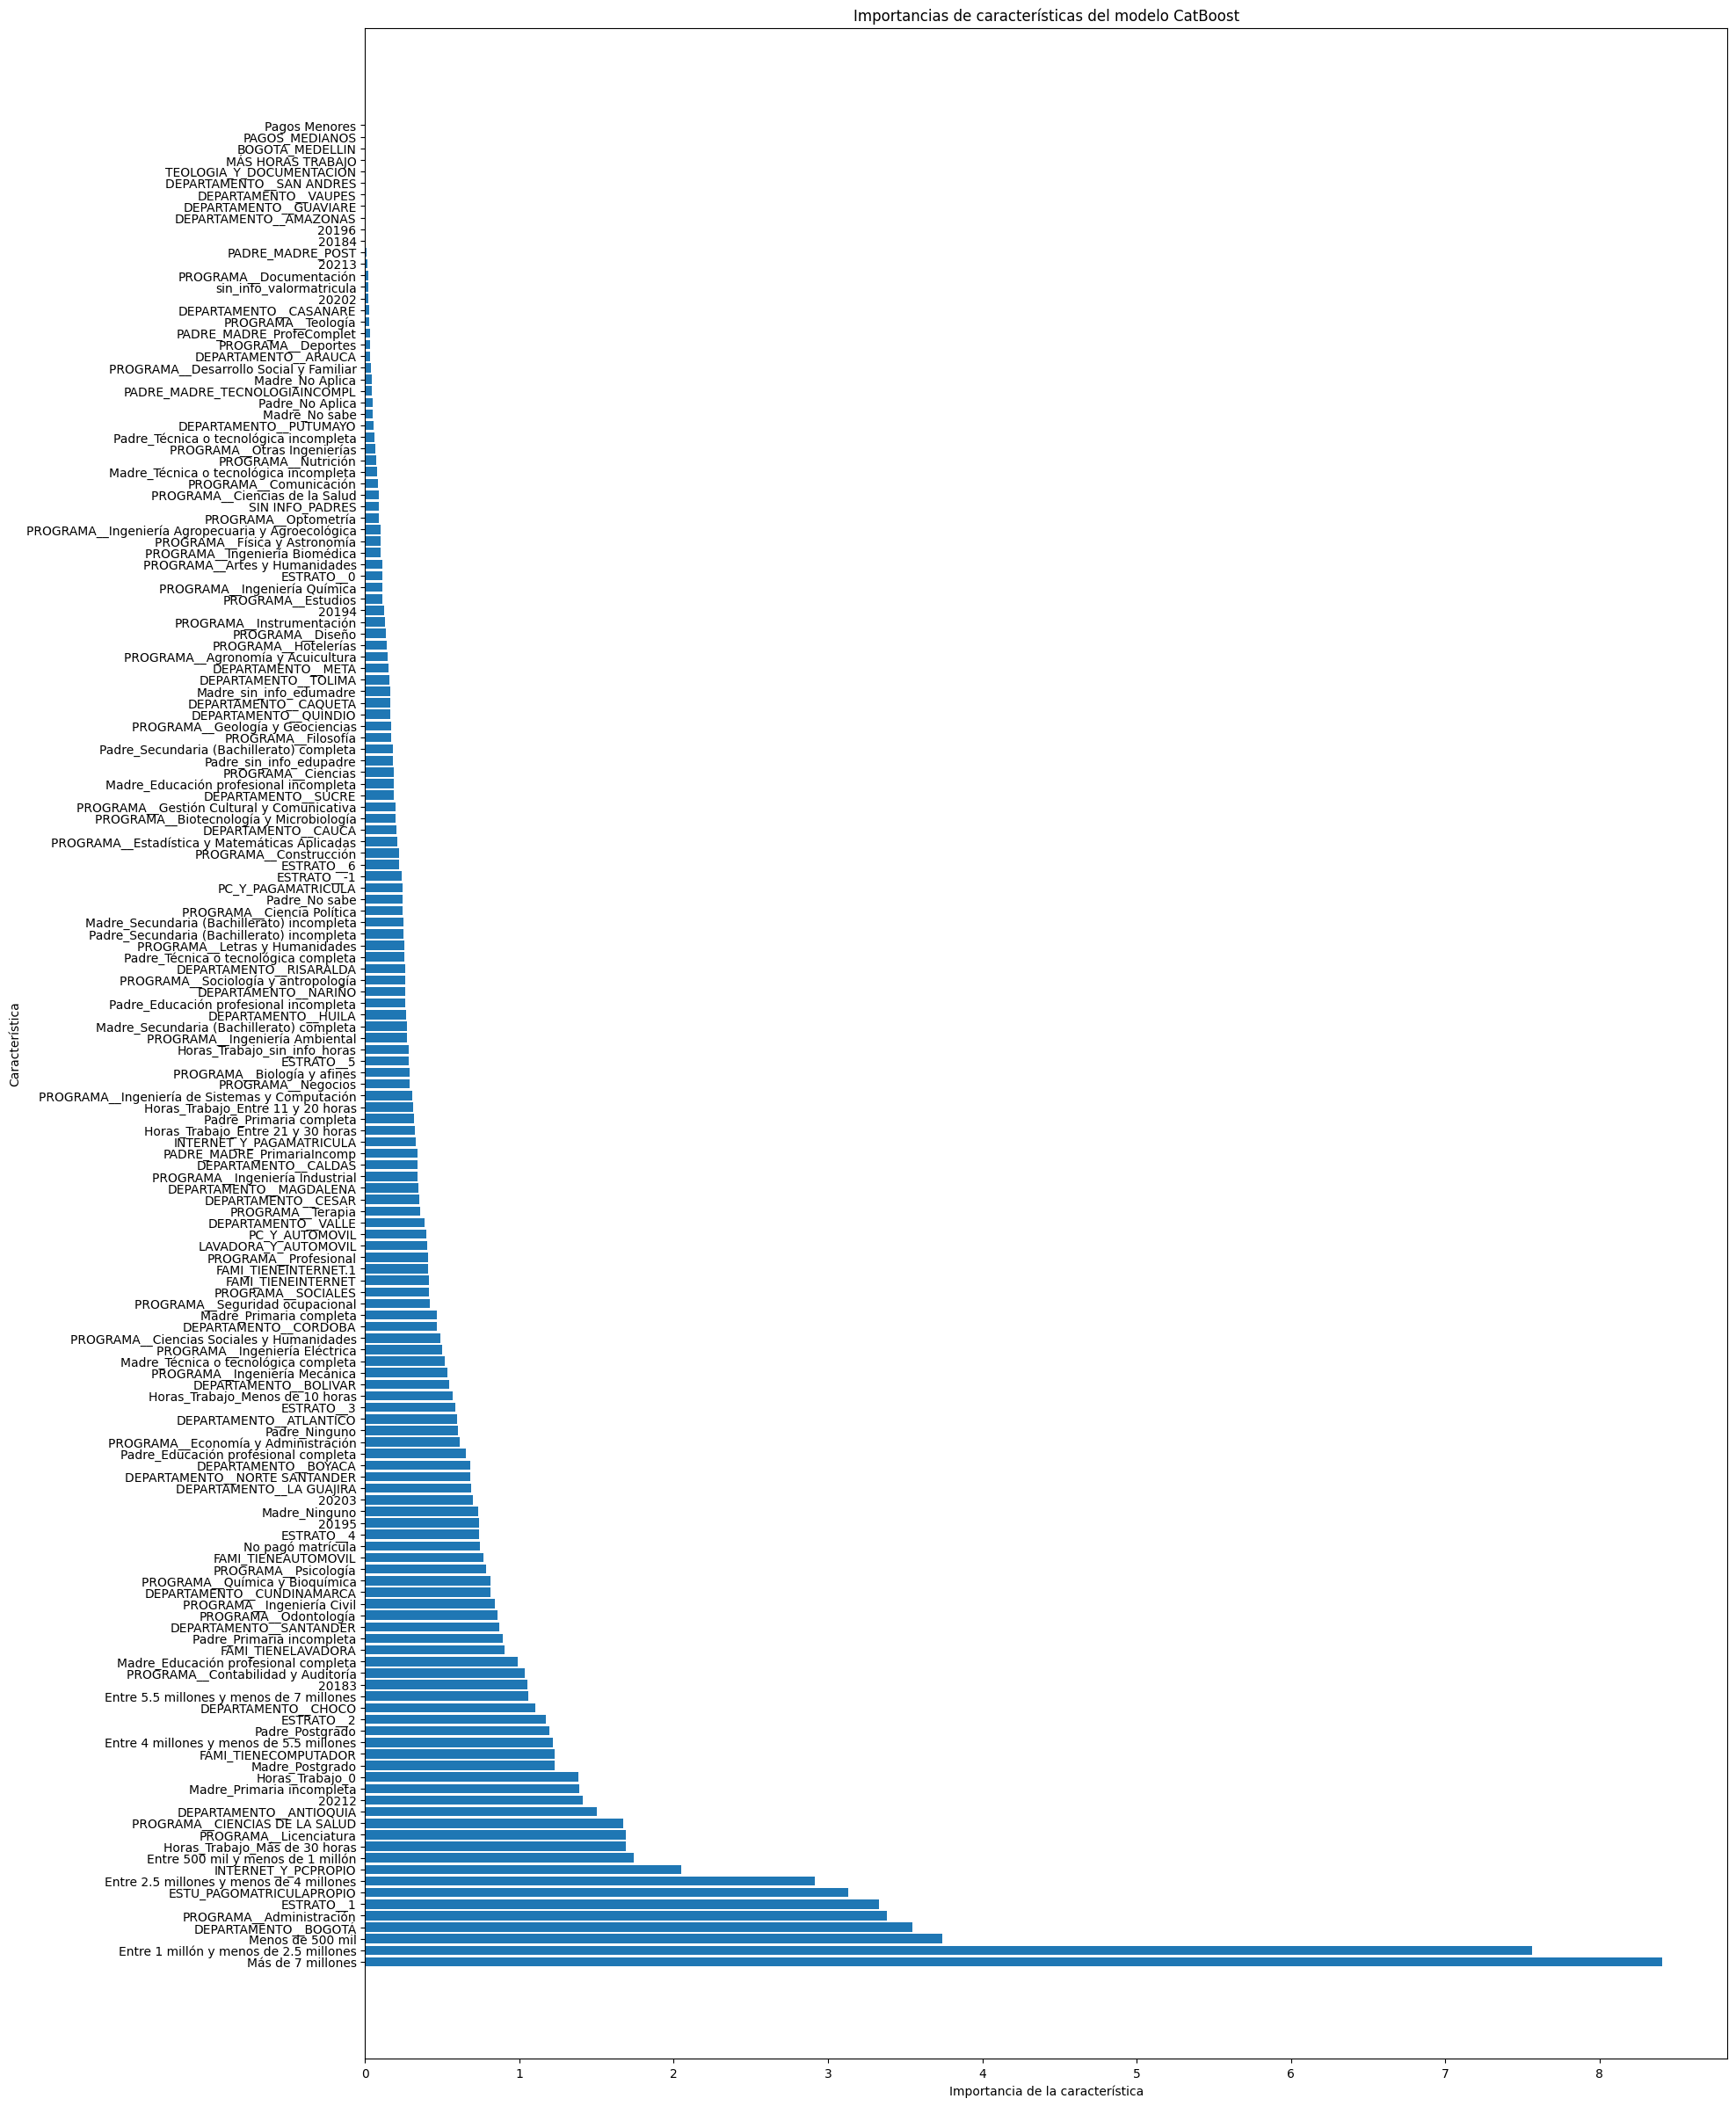

In [54]:
import matplotlib.pyplot as plt

importances = catboost_model.feature_importances_

# Nombres de las características
feature_names = X.columns

# Ordenar las características por importancia
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = feature_names[indices]

# Visualizar las importancias de características
plt.figure(figsize=(20, 30))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Importancia de la característica')
plt.ylabel('Característica')
plt.title('Importancias de características del modelo CatBoost')
plt.show()

In [55]:
import numpy as np

# Obtener el índice de la característica con la importancia más alta
indice_max_importancia = np.argmax(importances)

# Obtener el nombre de la característica con la importancia más alta
caracteristica_max_importancia = feature_names[indice_max_importancia]

# Obtener la importancia más alta
max_importancia = importances[indice_max_importancia]

print("La característica con la importancia más alta es:", caracteristica_max_importancia)
print("Su importancia es:", max_importancia)

# Para encontrar la segunda característica más importante, puedes eliminar la característica
# con la importancia más alta y luego encontrar la característica con la importancia más alta
# en el array restante de importancias.
importances_sin_max = np.delete(importances, indice_max_importancia)
feature_names_sin_max = np.delete(feature_names, indice_max_importancia)

# Obtener el índice de la segunda característica con la importancia más alta
indice_segunda_max_importancia = np.argmax(importances_sin_max)

# Obtener el nombre de la segunda característica con la importancia más alta
caracteristica_segunda_max_importancia = feature_names_sin_max[indice_segunda_max_importancia]

# Obtener la importancia de la segunda característica más alta
segunda_max_importancia = importances_sin_max[indice_segunda_max_importancia]

print("La segunda característica con la importancia más alta es:", caracteristica_segunda_max_importancia)
print("Su importancia es:", segunda_max_importancia)


La característica con la importancia más alta es: Más de 7 millones
Su importancia es: 8.408255313189313
La segunda característica con la importancia más alta es: Entre 1 millón y menos de 2.5 millones
Su importancia es: 7.561164757959805
